In [1]:
import os
import sys

#sys.path.append(os.path.dirname(__file__) + "/../")

from scipy.misc import imread

from config import load_config
from nnet import predict
from dataset.pose_dataset import data_to_input


cfg = load_config("demo/pose_cfg.yaml")

# Load and setup CNN part detector
sess, inputs, outputs = predict.setup_pose_prediction(cfg)

# Read image from file
file_name = "bumpie_week_27.jpg"
image = imread(file_name, mode='RGB')[::2, ::2]

image_batch = data_to_input(image)

# Compute prediction with the CNN
outputs_np = sess.run(outputs, feed_dict={inputs: image_batch})
scmap, locref, _ = predict.extract_cnn_output(outputs_np, cfg)

# Extract maximum scoring location from the heatmap, assume 1 person
pose = predict.argmax_pose_predict(scmap, locref, cfg.stride)

# Visualise
#visualize.show_heatmaps(cfg, image, scmap, pose)



Instructions for updating:
Use the retry module or similar alternatives.
INFO:tensorflow:Restoring parameters from models/mpii/mpii-single-resnet-101


INFO:tensorflow:Restoring parameters from models/mpii/mpii-single-resnet-101
/home/hastings/.local/lib/python3.5/site-packages/ipykernel_launcher.py:20: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


In [2]:
import os
from PIL import Image
import numpy as np
images = []
for im in sorted(os.listdir("../../Downloads/TimeLapse/")):
    print(im)
    images.append(imread("../../Downloads/TimeLapse/" + im, mode='RGB')[::2, ::2])

mask.png
output_0239.png
output_0242.png
output_0243.png


/home/hastings/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  import sys


output_0245.png
output_0247.png
output_0249.png
output_0251.png
output_0253.png
output_0255.png
output_0257.png
output_0259.png
output_0261.png
output_0263.png
output_0265.png
output_0267.png
output_0269.png
output_0271.png
output_0273.png
output_0275.png
output_0277.png
output_0279.png
output_0281.png
output_0283.png
output_0285.png
output_0287.png
output_0289.png
output_0291.png
output_0293.png
output_0294.png
output_0297.png
output_0299.png
output_0300.png
output_0303.png
output_0305.png
output_0307.png
output_0308.png
output_0311.png
output_0313.png
output_0314.png
output_0316.png
output_0319.png
output_0320.png
output_0322.png
output_0325.png
output_0327.png
output_0328.png
output_0331.png
output_0333.png


In [3]:
poses = []
for image in images:
    image_batch = data_to_input(image)

    # Compute prediction with the CNN
    outputs_np = sess.run(outputs, feed_dict={inputs: image_batch})
    scmap, locref, _ = predict.extract_cnn_output(outputs_np, cfg)

    # Extract maximum scoring location from the heatmap, assume 1 person
    pose = predict.argmax_pose_predict(scmap, locref, cfg.stride)
    poses.append(pose)

In [20]:
poses = np.array(poses)

In [5]:
locref.shape

(60, 60, 14, 2)

In [6]:
pose

array([[2.75093413e+02, 4.70790567e+02, 2.10726187e-01],
       [2.37572034e+02, 4.10640463e+02, 8.57014000e-01],
       [2.31284364e+02, 2.98225174e+02, 8.32161725e-01],
       [2.78120530e+02, 2.99405780e+02, 9.14987803e-01],
       [2.62475349e+02, 4.15717856e+02, 7.25531995e-01],
       [2.75031825e+02, 4.72486062e+02, 5.86428754e-02],
       [2.43142683e+02, 2.64401483e+02, 1.02828115e-01],
       [2.72971547e+02, 2.40230131e+02, 3.72558057e-01],
       [2.67671387e+02, 1.37749346e+02, 7.15188444e-01],
       [2.71700250e+02, 1.42692733e+02, 9.58687127e-01],
       [2.73988587e+02, 2.43527032e+02, 9.30438876e-01],
       [2.51220401e+02, 3.30845662e+02, 9.93997812e-01],
       [2.53302336e+02, 1.06503223e+02, 8.39432359e-01],
       [2.40915463e+02, 3.15492983e+01, 5.82700789e-01]])

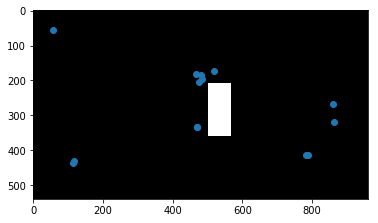

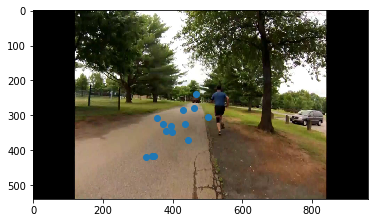

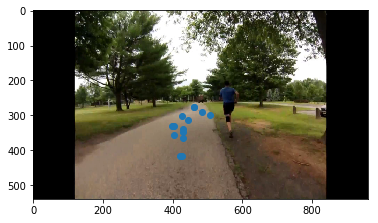

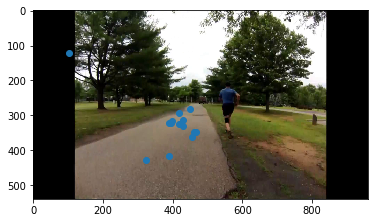

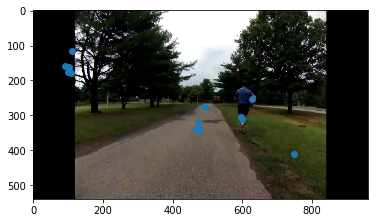

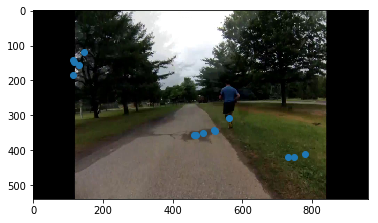

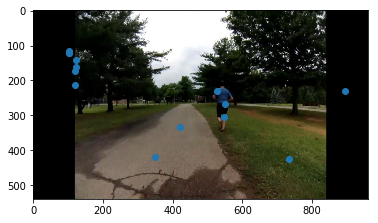

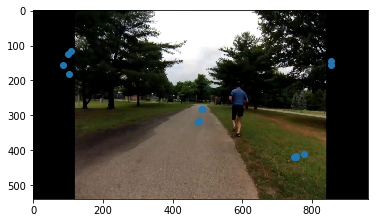

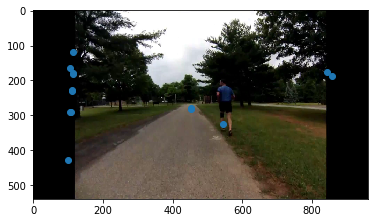

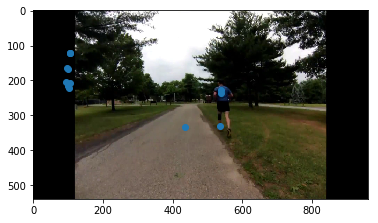

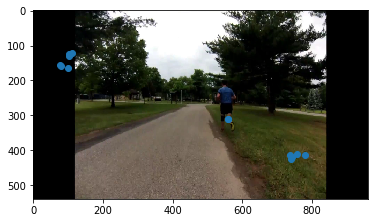

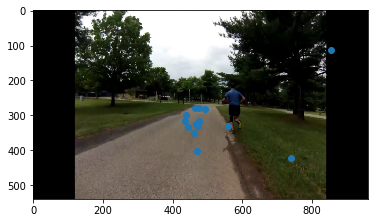

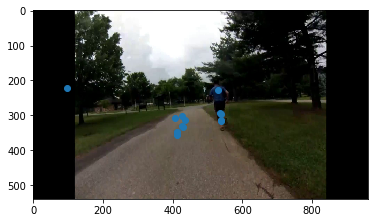

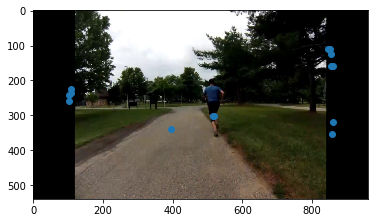

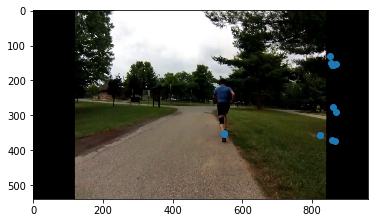

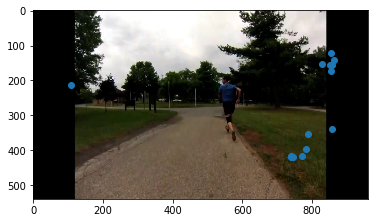

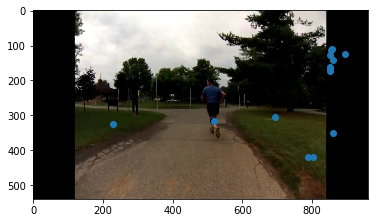

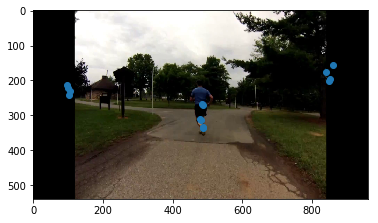

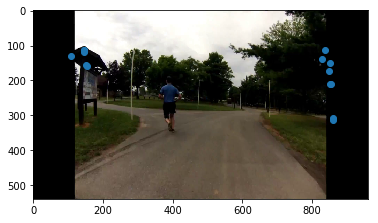

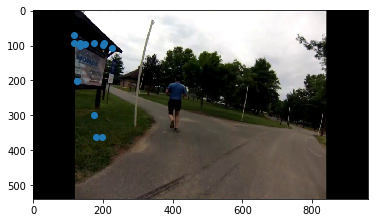

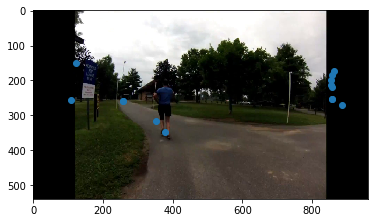

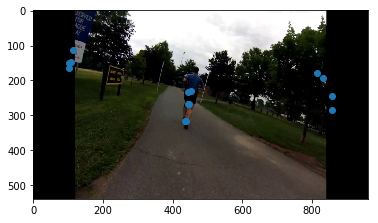

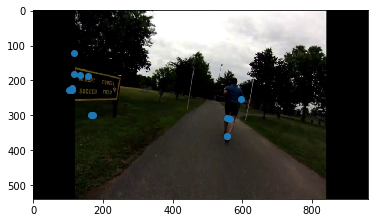

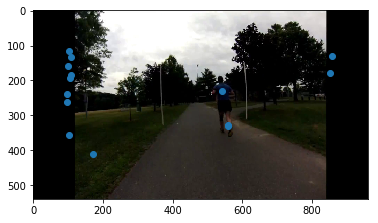

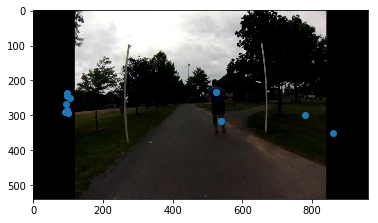

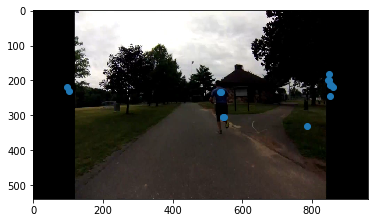

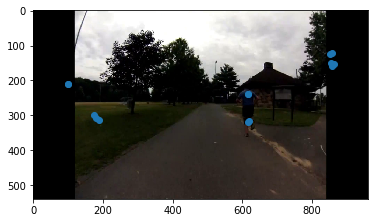

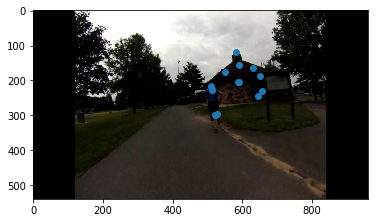

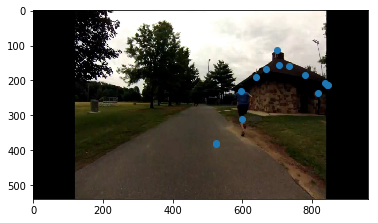

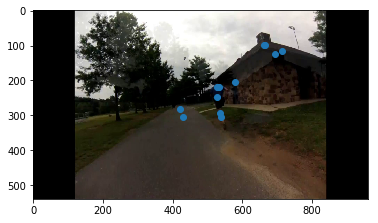

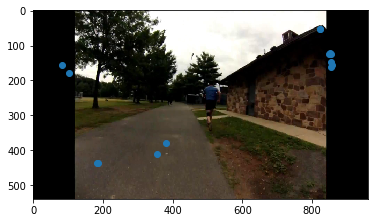

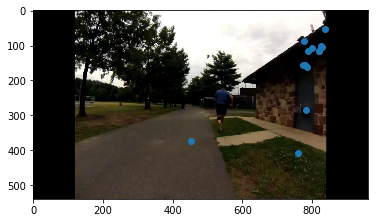

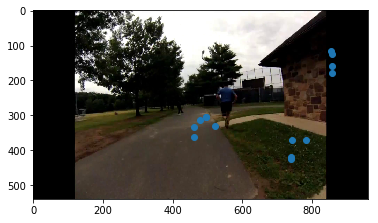

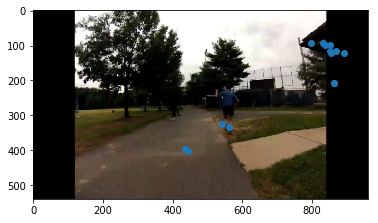

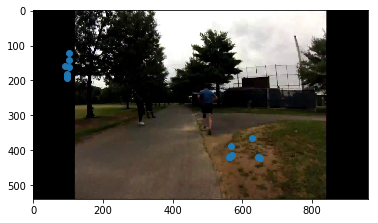

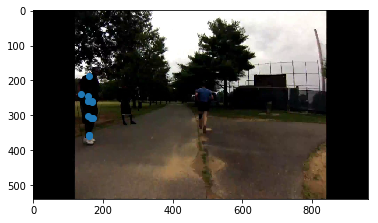

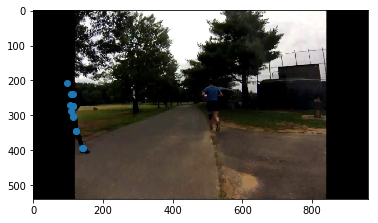

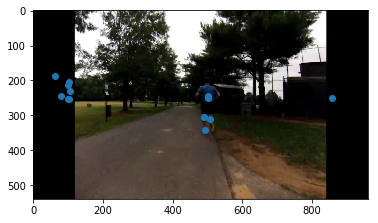

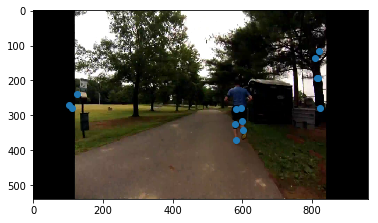

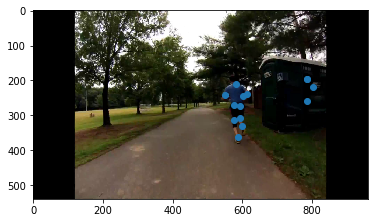

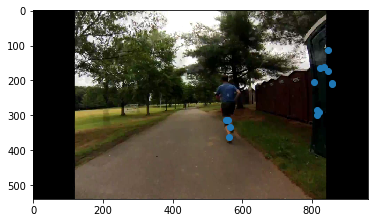

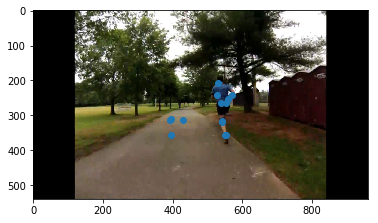

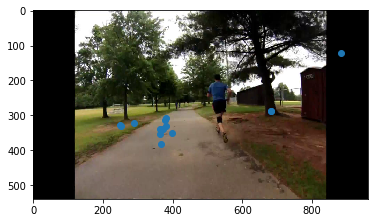

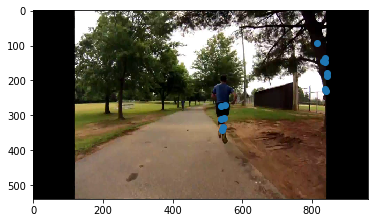

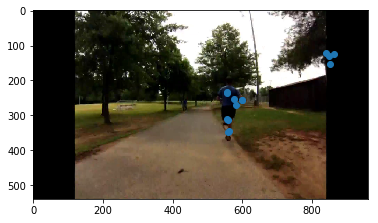

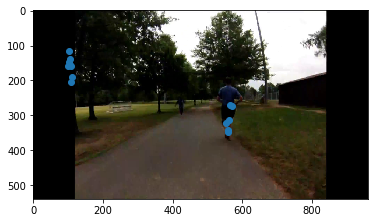

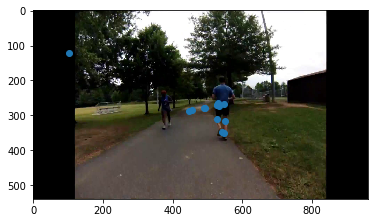

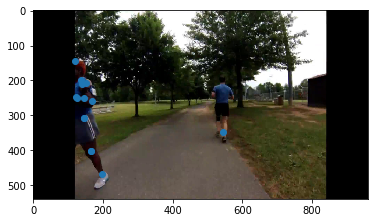

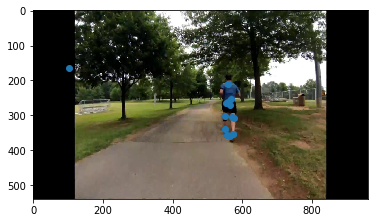

In [24]:
import matplotlib.pyplot as plt
for image, pose in zip(images, poses):
    plt.imshow(image)
    plt.scatter(pose[:, 0], pose[:, 1])
    plt.show()

0


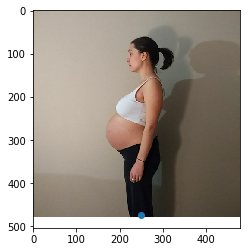

1


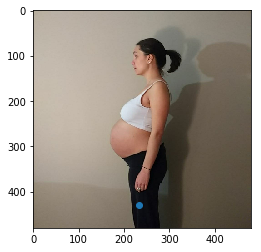

2


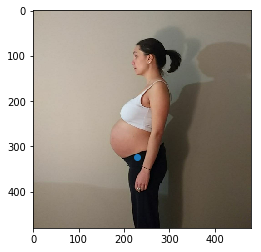

3


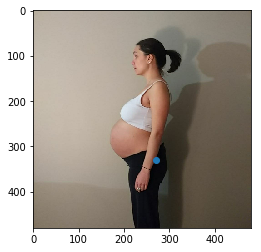

4


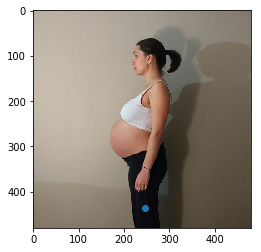

5


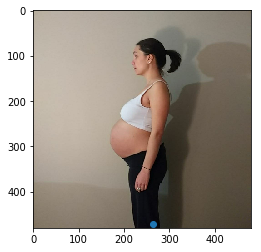

6


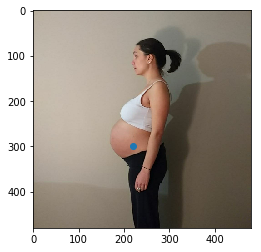

7


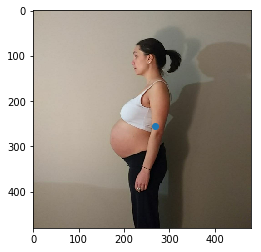

8


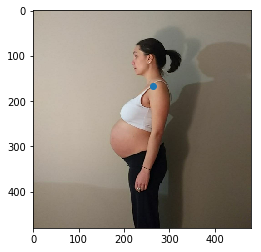

9


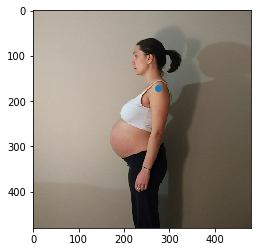

10


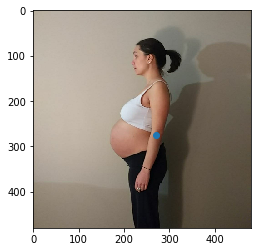

11


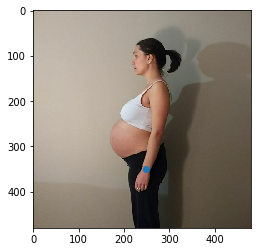

12


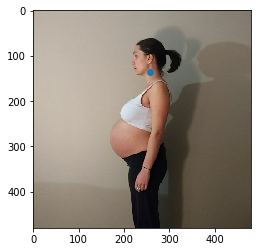

13


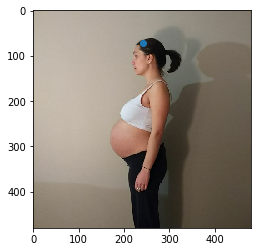

In [21]:
for i in range(14):
    print(i)
    
    plt.imshow(image)
    plt.scatter(pose[i:i + 1, 0], pose[i:i+1, 1])
    plt.show()

In [27]:
y, x = np.mgrid[0:image.shape[0], 0:image.shape[1]]

In [28]:
x.shape

(480, 480)

In [29]:
x

array([[  0,   1,   2, ..., 477, 478, 479],
       [  0,   1,   2, ..., 477, 478, 479],
       [  0,   1,   2, ..., 477, 478, 479],
       ...,
       [  0,   1,   2, ..., 477, 478, 479],
       [  0,   1,   2, ..., 477, 478, 479],
       [  0,   1,   2, ..., 477, 478, 479]])

In [30]:
x = x.flatten()
y = y.flatten()

In [21]:
finished = []

for i in range(120):
    fixed = poses[0, (9, 11), 0:2].transpose() 
    moving = poses[i, (9, 11), 0:2].transpose()

    fixedtrans = np.sum(fixed, 1, keepdims=True) / 2
    movingtrans = np.sum(moving, 1, keepdims=True) / 2
    
    trans = fixedtrans-movingtrans
    
    scale = np.abs(fixedtrans) /np.abs(movingtrans)
    print(trans)
    finished.append(np.roll(
        np.roll(images[i], int(trans[0, 0]), 1)
        ,int(trans[1, 0]), 0))
    
    plt.show()

[[0.]
 [0.]]
[[266.06312475]
 [-64.0554691 ]]
[[225.85309717]
 [-55.62155265]]
[[258.56383106]
 [-71.24328797]]
[[127.38104627]
 [-39.68284032]]
[[380.55628681]
 [  2.05550194]]
[[357.13870838]
 [ 74.66982949]]
[[ 6.76740649]
 [19.8182739 ]]
[[186.1981912 ]
 [ 67.85401154]]
[[570.94397917]
 [ 88.54032445]]
[[251.42155388]
 [-18.07619068]]
[[196.4001817 ]
 [-53.59750551]]
[[199.72480485]
 [-59.55256272]]
[[192.7387816 ]
 [ 69.13575632]]
[[-168.87622693]
 [  -5.45152929]]
[[-126.05329023]
 [ -44.10128293]]
[[-183.25937529]
 [ 132.42552769]]
[[196.48372164]
 [ 42.308956  ]]
[[169.71082416]
 [ 98.93960944]]
[[491.34536043]
 [150.31629176]]
[[-186.33284315]
 [  32.22528118]]
[[-172.71259007]
 [  11.77023333]]
[[305.13348168]
 [ 33.26832765]]
[[195.3920702 ]
 [ 67.01057959]]
[[230.46880582]
 [-44.25015527]]
[[-180.6385816 ]
 [  46.22710693]]
[[155.67394963]
 [ 22.32396524]]
[[136.06816778]
 [ 13.43179238]]
[[-70.23020199]
 [ 49.694215  ]]
[[139.13766554]
 [ -4.7650921 ]]
[[-181.55532447]
 [ 

IndexError: index 49 is out of bounds for axis 0 with size 49

In [64]:
import scipy.linalg as l
np.roll?

In [62]:
np.array(images)

array([[[[172, 161, 141],
         [174, 163, 143],
         [174, 163, 143],
         ...,
         [123, 115, 102],
         [121, 113, 100],
         [120, 112,  99]],

        [[172, 161, 141],
         [174, 163, 143],
         [174, 163, 143],
         ...,
         [124, 116, 103],
         [122, 114, 101],
         [120, 112,  99]],

        [[172, 161, 141],
         [174, 163, 143],
         [174, 163, 143],
         ...,
         [124, 116, 103],
         [123, 115, 102],
         [122, 114, 101]],

        ...,

        [[122, 110,  94],
         [123, 111,  95],
         [124, 112,  96],
         ...,
         [ 97,  85,  73],
         [ 94,  82,  70],
         [ 94,  82,  70]],

        [[121, 109,  93],
         [123, 111,  95],
         [123, 111,  95],
         ...,
         [ 95,  83,  71],
         [ 94,  82,  70],
         [ 93,  81,  69]],

        [[122, 110,  94],
         [123, 111,  95],
         [123, 111,  95],
         ...,
         [ 95,  83,  71],
        

In [40]:
newcoords = np.dot(A, rectcoords)

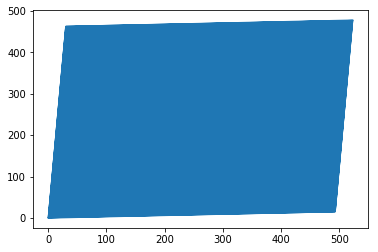

In [42]:
plt.plot(newcoords[0], newcoords[1])

In [56]:
fixedtrans

array([[259.2285229 ],
       [261.52078134]])

In [47]:
A

array([[-0.00673579, -0.0873503 ],
       [ 0.07488123,  0.97106575]])

In [4]:
import matplotlib.animation as animation
from IPython.display import HTML
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
ims = []
for i in range(len(images)):
    ims.append([plt.imshow(images[i], animated=True)])

ani = animation.ArtistAnimation(fig, ims, interval=30, blit=True, repeat_delay=1000)
plt.close()
HTML(ani.to_html5_video())

In [13]:
import matplotlib.animation as animation
from IPython.display import HTML
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
ims = []
for i in range(len(finished)):
    ims.append([plt.imshow(finished[i], animated=True)])

ani = animation.ArtistAnimation(fig, ims, interval=170, blit=True, repeat_delay=1000)
plt.close()
HTML(ani.to_html5_video())

In [22]:
import matplotlib.animation as animation
from IPython.display import HTML
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
ims = []
for i in range(len(finished)):
    ims.append([plt.imshow(finished[i], animated=True)])

ani = animation.ArtistAnimation(fig, ims, interval=170, blit=True, repeat_delay=1000)
plt.close()
HTML(ani.to_html5_video())